In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import acquire
import prepare

**1. Acquire, prepare & split your data.**

**- Acquire**

In [5]:
df = acquire.get_iris_data()

this file exists, reading from csv


In [7]:
df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [8]:
df.nunique()

species_id          3
measurement_id    150
sepal_length       35
sepal_width        23
petal_length       43
petal_width        22
species_name        3
dtype: int64

**- Prep**

In [10]:
df = prepare.prep_iris()

this file exists, reading from csv


In [14]:
train, validate, test = prepare.split_data(df, 'species')
train

,sepal_length,sepal_width,petal_length,petal_width,species
24,4.8,3.4,1.9,0.2,setosa
147,6.5,3.0,5.2,2.0,virginica
88,5.6,3.0,4.1,1.3,versicolor
123,6.3,2.7,4.9,1.8,virginica
31,5.4,3.4,1.5,0.4,setosa
...,...,...,...,...,...
52,6.9,3.1,4.9,1.5,versicolor
41,4.5,2.3,1.3,0.3,setosa
12,4.8,3.0,1.4,0.1,setosa
20,5.4,3.4,1.7,0.2,setosa


**2. Univariate Stats**

* For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64


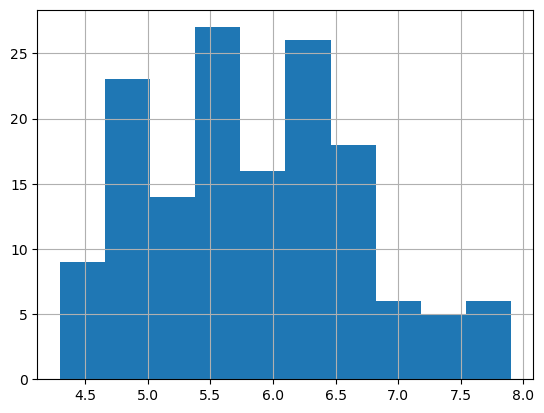

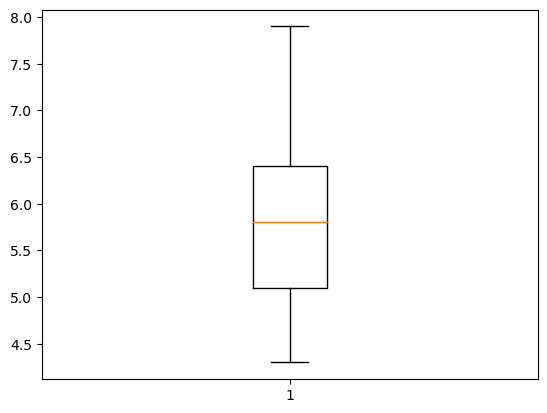

In [25]:
print(df['sepal_length'].describe())
df['sepal_length'].hist()
plt.show()
plt.boxplot(df['sepal_length'])
plt.show()

count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64


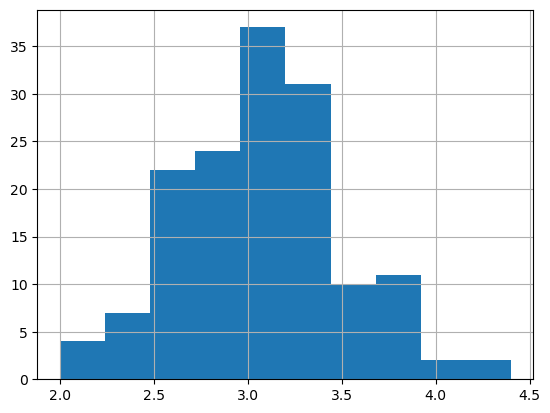

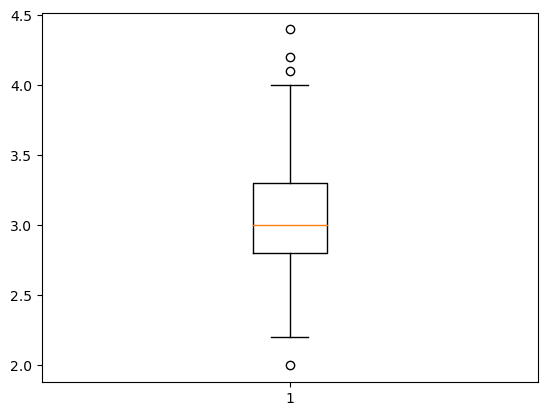

In [26]:
print(df['sepal_width'].describe())
df['sepal_width'].hist()
plt.show()
plt.boxplot(df['sepal_width'])
plt.show()

count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal_length, dtype: float64


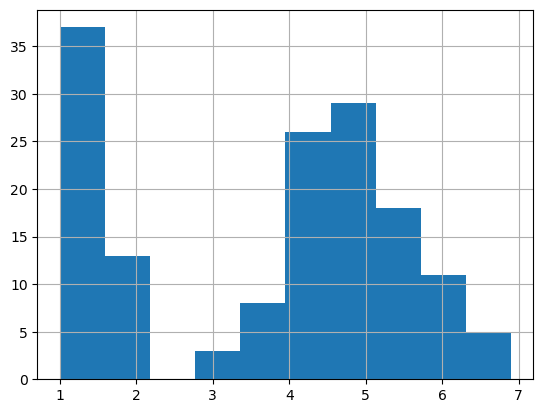

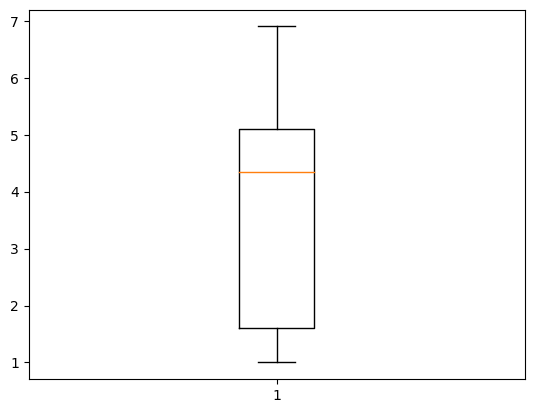

In [27]:
print(df['petal_length'].describe())
df['petal_length'].hist()
plt.show()
plt.boxplot(df['petal_length'])
plt.show()

count    150.000000
mean       1.199333
std        0.762238
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal_width, dtype: float64


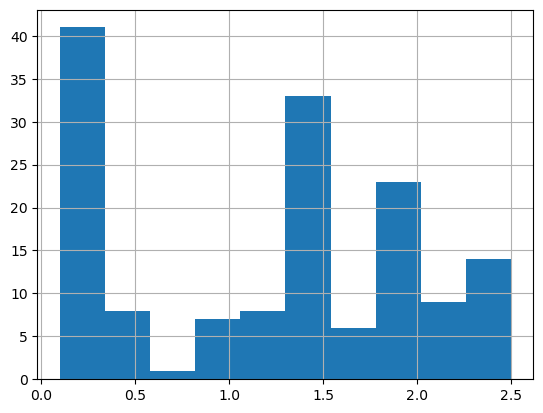

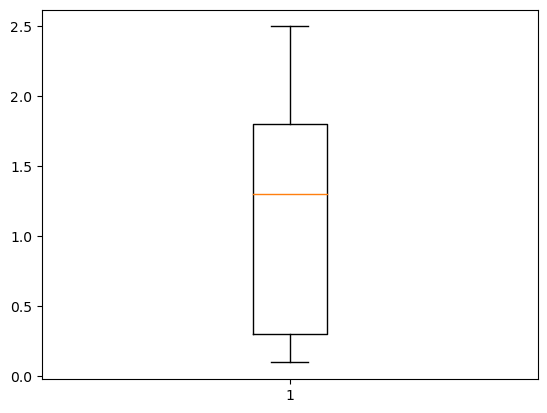

In [28]:
print(df['petal_width'].describe())
df['petal_width'].hist()
plt.show()
plt.boxplot(df['petal_width'])
plt.show()

* For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

col_0       Num of Species
species                   
setosa                  50
versicolor              50
virginica               50


<Axes: xlabel='species', ylabel='Num of Species'>

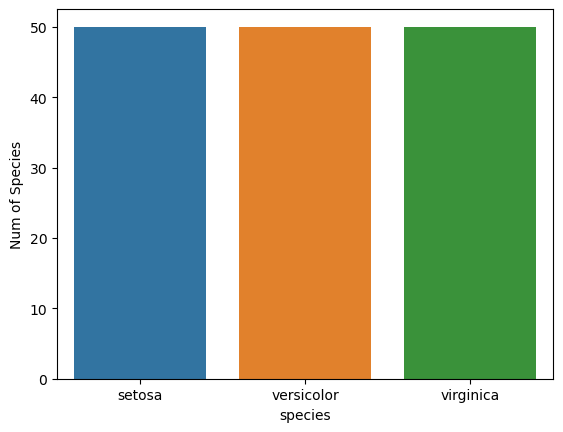

In [52]:
freq = pd.crosstab(df['species'], columns='Num of Species')
print(freq)
freq.reset_index(inplace=True)
sns.barplot(data=freq, x='species', y='Num of Species')

* Document takeaways & any actions.

 - There's the same amount of species for each kind.
 - There's no distinction between the species data.
 - Petal width was the only data set with outliers on the boxplot.
 - Petal length and width had most their data on the smallest bin.

**3. Bivariate Stats**

In [53]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
24,4.8,3.4,1.9,0.2,setosa
147,6.5,3.0,5.2,2.0,virginica
88,5.6,3.0,4.1,1.3,versicolor
123,6.3,2.7,4.9,1.8,virginica
31,5.4,3.4,1.5,0.4,setosa


* Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

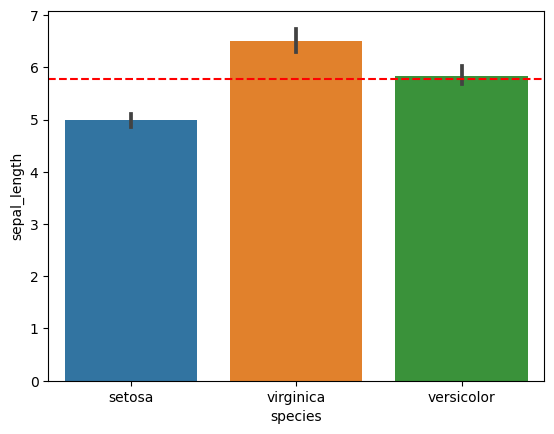

In [68]:
sns.barplot(data=train, y='sepal_length', x='species')
overall_mean = train['sepal_length'].mean()
plt.axhline(y=overall_mean, color='r', linestyle='--')

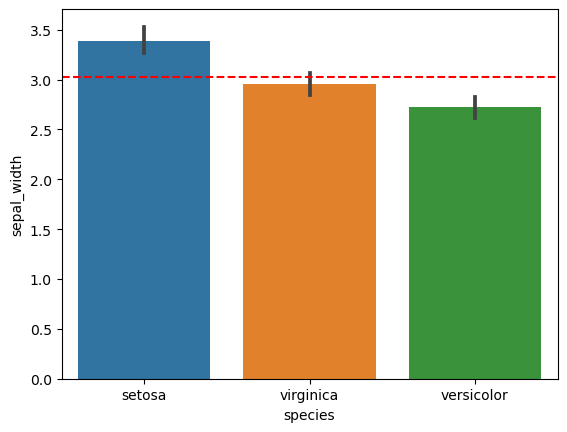

In [69]:
sns.barplot(data=train, y='sepal_width', x='species')
overall_mean = train['sepal_width'].mean()
plt.axhline(y=overall_mean, color='r', linestyle='--')

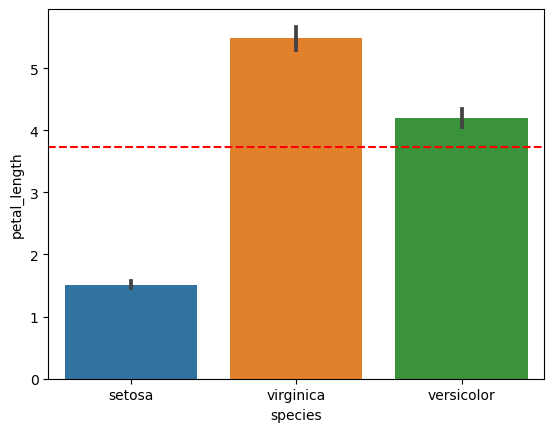

In [70]:
sns.barplot(data=train, y='petal_length', x='species')
overall_mean = train['petal_length'].mean()
plt.axhline(y=overall_mean, color='r', linestyle='--')

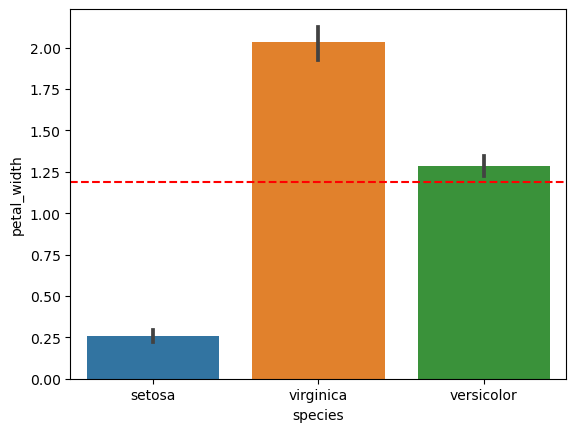

In [71]:
sns.barplot(data=train, y='petal_width', x='species')
overall_mean = train['petal_width'].mean()
plt.axhline(y=overall_mean, color='r', linestyle='--')

* For each measurement type, compute the descriptive statistics for each species.

In [63]:
train.groupby('species')['sepal_length'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,30.0,4.993333,0.354219,4.3,4.800,5.0,5.175,5.7
versicolor,30.0,5.843333,0.478996,5.0,5.525,5.7,6.075,7.0
virginica,30.0,6.506667,0.616404,4.9,6.225,6.4,6.875,7.9


In [64]:
train.groupby('species')['sepal_width'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,30.0,3.39,0.384484,2.3,3.200,3.40,3.65,4.4
versicolor,30.0,2.72,0.303315,2.0,2.525,2.75,2.90,3.4
virginica,30.0,2.96,0.319050,2.5,2.800,2.95,3.10,3.8


In [65]:
train.groupby('species')['petal_length'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,30.0,1.510000,0.178789,1.1,1.4,1.5,1.600,1.9
versicolor,30.0,4.196667,0.444494,3.0,4.0,4.2,4.500,5.1
virginica,30.0,5.480000,0.508141,4.5,5.1,5.5,5.675,6.9


In [66]:
train.groupby('species')['petal_width'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,30.0,0.256667,0.100630,0.1,0.2,0.20,0.300,0.5
versicolor,30.0,1.283333,0.170361,1.0,1.2,1.30,1.375,1.6
virginica,30.0,2.033333,0.277095,1.4,1.8,2.05,2.300,2.5


* For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

(738.0, 2.0617069812153646e-05)

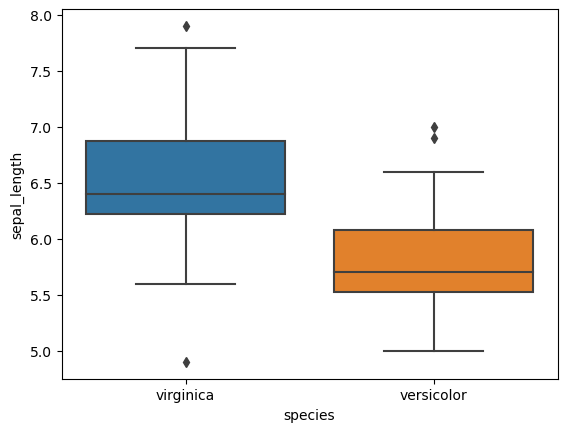

In [85]:
filtered_data = train[train['species'].isin(['virginica', 'versicolor'])]
sns.boxplot(x='species', y='sepal_length', data=filtered_data)

u_statistic, p_value = stats.mannwhitneyu(
    filtered_data[filtered_data['species'] == 'virginica']['sepal_length'],
    filtered_data[filtered_data['species'] == 'versicolor']['sepal_length']
)
u_statistic, p_value

(627.5, 0.00844990346320156)

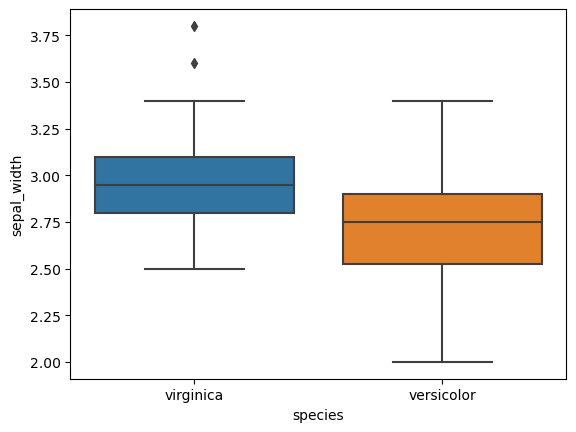

In [84]:
filtered_data = train[train['species'].isin(['virginica', 'versicolor'])]
sns.boxplot(x='species', y='sepal_width', data=filtered_data)

u_statistic, p_value = stats.mannwhitneyu(
    filtered_data[filtered_data['species'] == 'virginica']['sepal_width'],
    filtered_data[filtered_data['species'] == 'versicolor']['sepal_width']
)
u_statistic, p_value

(884.0, 1.368106833576727e-10)

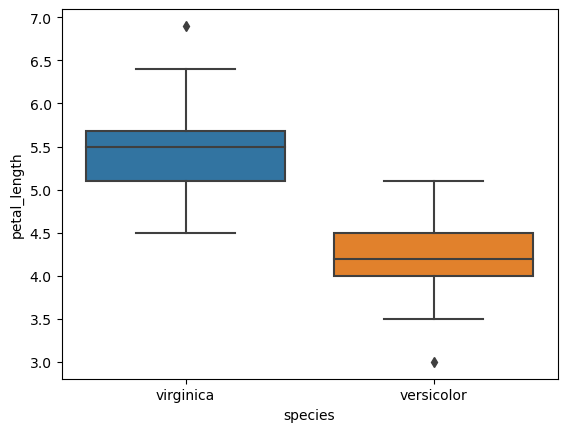

In [86]:
filtered_data = train[train['species'].isin(['virginica', 'versicolor'])]
sns.boxplot(x='species', y='petal_length', data=filtered_data)

u_statistic, p_value = stats.mannwhitneyu(
    filtered_data[filtered_data['species'] == 'virginica']['petal_length'],
    filtered_data[filtered_data['species'] == 'versicolor']['petal_length']
)
u_statistic, p_value

(889.0, 7.12423012584302e-11)

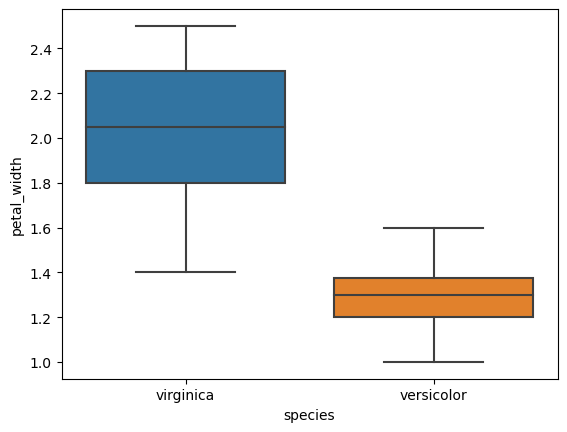

In [87]:
filtered_data = train[train['species'].isin(['virginica', 'versicolor'])]
sns.boxplot(x='species', y='petal_width', data=filtered_data)

u_statistic, p_value = stats.mannwhitneyu(
    filtered_data[filtered_data['species'] == 'virginica']['petal_width'],
    filtered_data[filtered_data['species'] == 'versicolor']['petal_width']
)
u_statistic, p_value

* Document takeaways & any actions.

 - Sepal width's p-value is the closest to the alpha of 0.05.
 - Virginica has higher means on everything.
 - There is a significant difference between the means of both groups
 

**4. Multivariate Stats**

- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.



/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


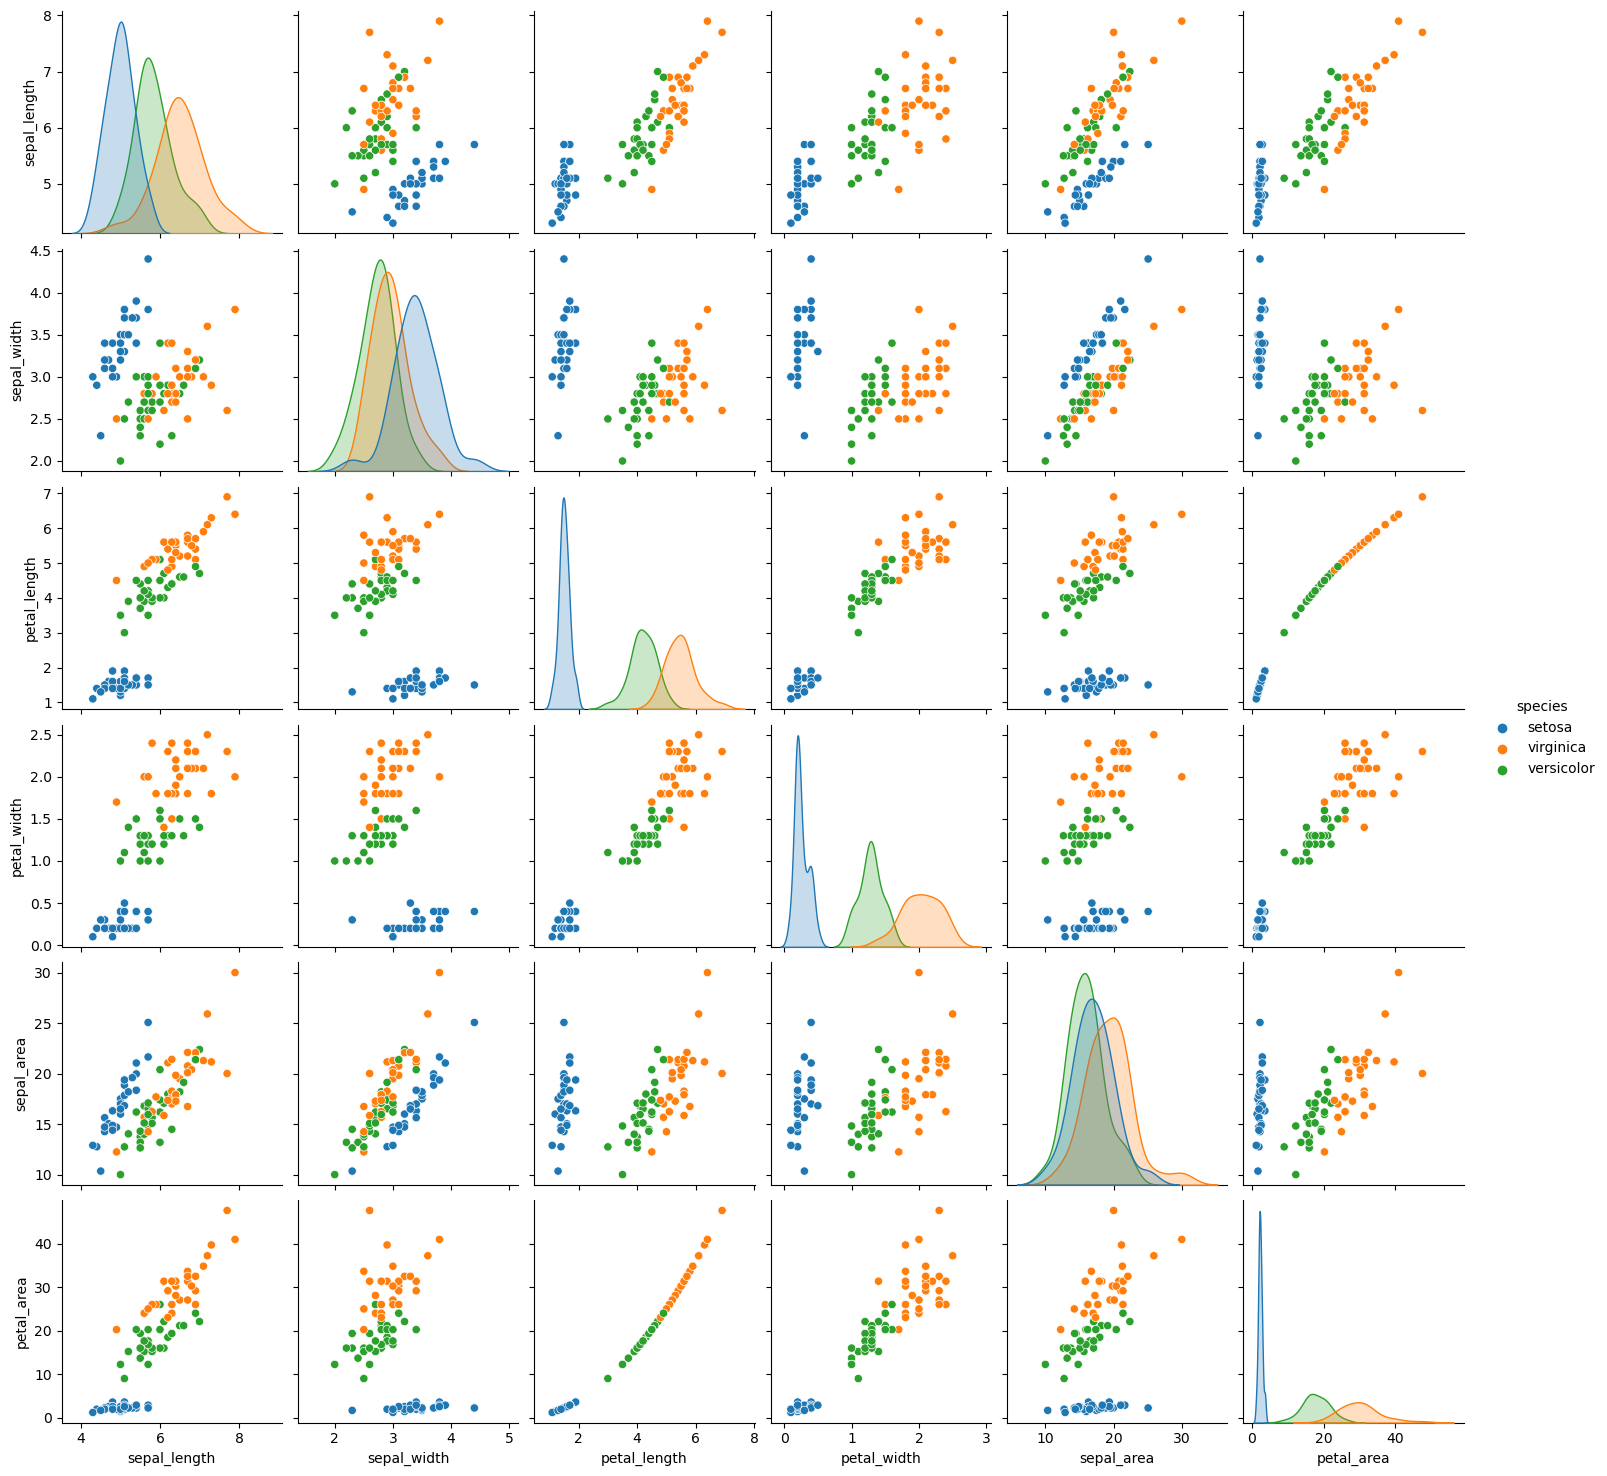

In [101]:
sns.pairplot(train, hue='species', dropna=False)

- Visualize two numeric variables of the species. Hint: sns.relplot with hue or col



/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


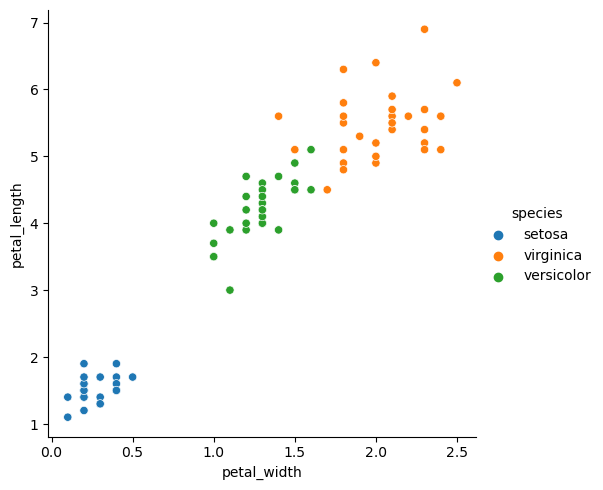

In [89]:
sns.relplot(data=train, x="petal_width", y="petal_length", hue="species")

- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.



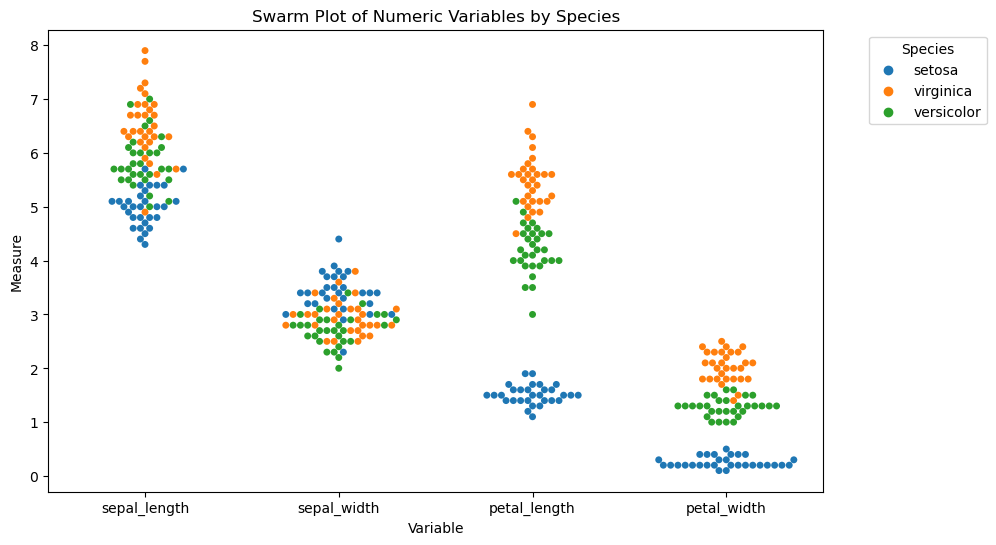

In [92]:
melted_df = pd.melt(train, id_vars='species', var_name='variable', value_name='measure')

plt.figure(figsize=(10, 6))
sns.swarmplot(x='variable', y='measure', hue='species', data=melted_df)

plt.title('Swarm Plot of Numeric Variables by Species')
plt.xlabel('Variable')
plt.ylabel('Measure')
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).



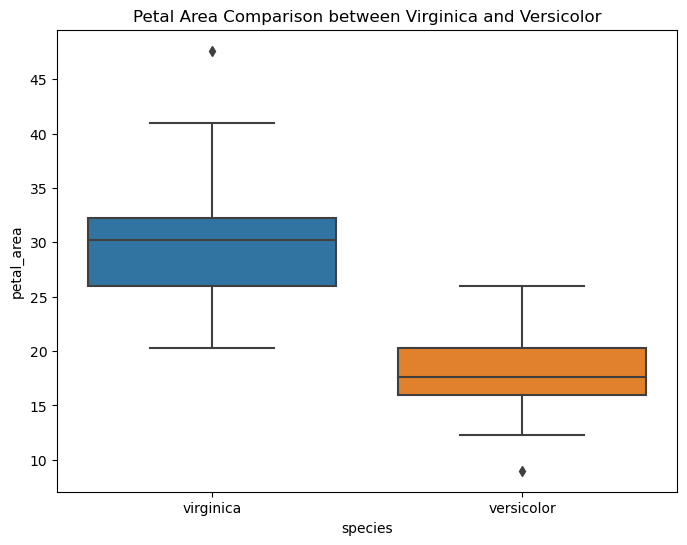

In [97]:
train['petal_area'] = train['petal_length'] * train['petal_length']

# Filter for virginica and setosa species
filtered_data = train[train['species'].isin(['virginica', 'versicolor'])]

# Create a boxplot for visual comparison
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='petal_area', data=filtered_data)
plt.title('Petal Area Comparison between Virginica and Versicolor')
plt.show()

- Document takeaways and any actions.



**Part III**

* Explore your telco data to discover drivers of churn
* Determine if certain columns should be dropped
* Determine if it would be valuable to bin some numeric columns
* Determine if it would be valuable to combine multiple columns into one.


In [98]:
df = prepare.prep_telco()

this file exists, reading from csv


In [99]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,True,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,True,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,True,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,True,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,True,Mailed check


In [108]:
df.nunique()

customer_id              7043
gender                      2
senior_citizen              2
partner                     2
dependents                  2
tenure                     73
phone_service               2
multiple_lines              3
online_security             3
online_backup               3
device_protection           3
tech_support                3
streaming_tv                3
streaming_movies            3
paperless_billing           2
monthly_charges          1585
total_charges            6531
churn                       2
contract_type               3
internet_service_type       2
payment_type                4
dtype: int64

In [102]:
train, validate, test = prepare.split_data(df, 'churn')
train

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
2865,4083-BFNYK,Female,1,Yes,No,38,Yes,Yes,Yes,Yes,...,No,No,Yes,No,95.00,3591.25,No,One year,True,Credit card (automatic)
4107,5804-LEPIM,Female,1,No,No,2,Yes,No,No,No,...,No,No,No,Yes,70.35,139.05,Yes,Month-to-month,True,Electronic check
3453,4895-TMWIR,Male,1,Yes,No,11,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,19.95,214.75,Yes,Month-to-month,False,Mailed check
923,1342-JPNKI,Male,0,No,No,10,Yes,Yes,No,No,...,No,Yes,No,Yes,86.05,834.1,Yes,Month-to-month,True,Bank transfer (automatic)
2370,3397-AVTKU,Male,0,No,No,43,Yes,No,No,Yes,...,No,No,Yes,Yes,60.00,2548.55,No,Two year,True,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,1915-IOFGU,Female,0,No,No,1,Yes,No,No,No,...,No,No,No,No,70.50,70.5,Yes,Month-to-month,True,Electronic check
4999,7025-WCBNE,Male,1,No,No,47,Yes,Yes,No,Yes,...,Yes,No,No,No,59.60,2754,No,Two year,True,Bank transfer (automatic)
6892,9788-HNGUT,Male,0,Yes,No,72,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,116.95,8594.4,No,Two year,True,Credit card (automatic)
3718,5229-PRWKT,Male,0,No,No,8,Yes,Yes,No,No,...,No,No,Yes,Yes,86.55,649.65,Yes,Month-to-month,True,Electronic check


* What are your drivers of churn?



<Axes: xlabel='tenure', ylabel='monthly_charges'>

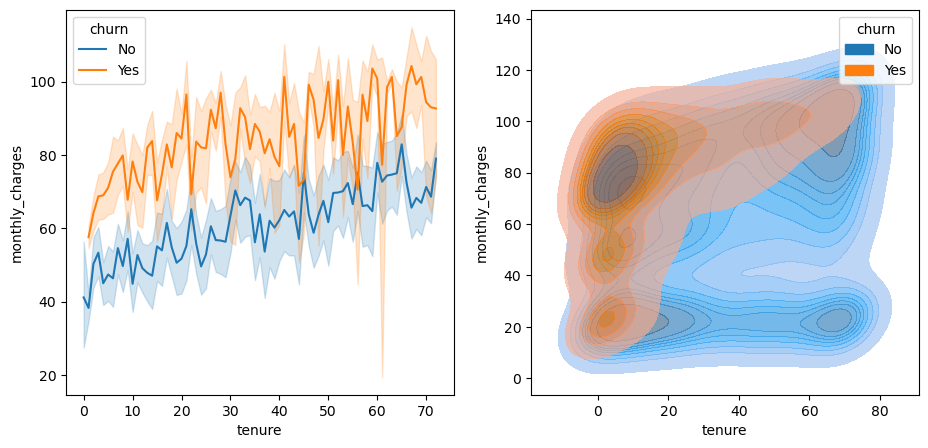

In [185]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 5))
sns.lineplot(data=train,x='tenure', y='monthly_charges', hue='churn', ax=axes[0])
sns.kdeplot(data=train,x='tenure', y='monthly_charges',hue='churn', ax=axes[1], fill=True, alpha=0.65)

<Axes: xlabel='tenure', ylabel='Density'>

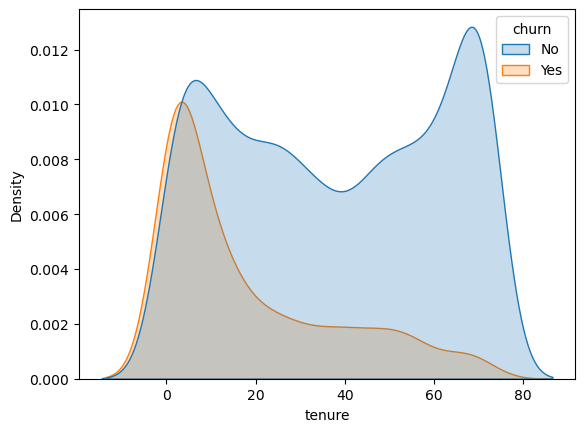

In [174]:
sns.kdeplot(data=train,x='tenure',hue='churn', fill=True)

* Does it make sense to combine any features?



* Do you find any surprises?




* Document any and all findings and takeaways in your notebook using markdown.

